<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Working_with_stocks_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 import alpha_vantage

ModuleNotFoundError: No module named 'alpha_vantage'

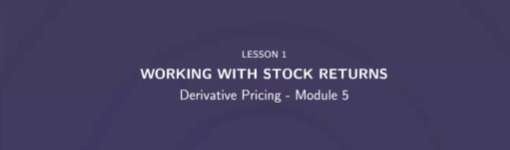

In [4]:
!pip install alpha_vantage
import alpha_vantage

In [5]:
APIkey = "PMFNBJ4QM8JEH1KB"

In [6]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=APIkey, output_format="pandas")
data, _ = ts.get_daily(symbol="TSLA", outputsize="full")
data = data.loc[
    "2012-01-01":"2021-12-31"
]  # Let's limit our data to the period 2012-2021
data.tail()

ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [7]:
import yfinance as yf

In [8]:
# Getting historical market data from Microsoft (MSFT)
msft = yf.Ticker("MSFT")
hist = msft.history(period="5d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-19 00:00:00-04:00,418.959991,421.750000,416.459991,421.529999,15234000,0.0,0.0
2024-08-20 00:00:00-04:00,421.700012,425.859985,421.640015,424.799988,16387600,0.0,0.0
2024-08-21 00:00:00-04:00,424.079987,426.399994,421.720001,424.140015,16067300,0.0,0.0
2024-08-22 00:00:00-04:00,424.359985,426.790009,414.609985,415.549988,19361900,0.0,0.0
2024-08-23 00:00:00-04:00,416.980011,419.260010,412.089996,416.790009,18473000,0.0,0.0


In [9]:
type(hist)

pandas.core.frame.DataFrame

There are some available parameters for the history() method that could come in handy and that we should be aware of:

- **period:** data period to download (either use period parameter or use 'start' and
'end'). Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max.

- **interval:** data interval (intraday data cannot extend last 60 days) Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

- **start:** If not using period - Download start date string (YYYY-MM-DD) or datetime.

- **end:** If not using period - Download end date string (YYYY-MM-DD) or datetime.

- **prepost:** Include Pre and Post market data in results? (Default is False)

- **auto_adjust:** Adjust all OHLC automatically? (Default is True)

- **actions:** Download stock dividends and stock split events? (Default is True)

Imagine we aim to download the maximum available historical data for MSFT:

In [11]:
msft.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059947,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059946,0.063158,0.059946,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-19 00:00:00-04:00,418.959991,421.750000,416.459991,421.529999,15234000,0.0,0.0
2024-08-20 00:00:00-04:00,421.700012,425.859985,421.640015,424.799988,16387600,0.0,0.0
2024-08-21 00:00:00-04:00,424.079987,426.399994,421.720001,424.140015,16067300,0.0,0.0


In [12]:
data = yf.download("SPY AAPL MSFT", start="2017-01-01", end="2021-04-30")
data.head()

[*********************100%%**********************]  3 of 3 completed


Price       Adj Close                             Close             \
Ticker           AAPL       MSFT         SPY       AAPL       MSFT   
Date                                                                 
2017-01-03  26.921541  56.828140  198.560028  29.037500  62.580002   
2017-01-04  26.891418  56.573872  199.741302  29.004999  62.299999   
2017-01-05  27.028166  56.573872  199.582596  29.152500  62.299999   
2017-01-06  27.329483  57.064240  200.296661  29.477501  62.840000   
2017-01-09  27.579807  56.882629  199.635544  29.747499  62.639999   

Price                        High                               Low  \
Ticker             SPY       AAPL       MSFT         SPY       AAPL   
Date                                                                  
2017-01-03  225.240005  29.082500  62.840000  225.830002  28.690001   
2017-01-04  226.580002  29.127501  62.750000  226.750000  28.937500   
2017-01-05  226.399994  29.215000  62.660000  226.580002  28.952499   
2017-01-06  227.210007  29.540001  63.150002  227.750000  29.117500   
2017-01-09  226.460007  29.857500  63.080002  227.070007  29.485001   

Price                                   Open                         \
Ticker           MSFT         SPY       AAPL       MSFT         SPY   
Date                                                                  
2017-01-03  62.130001  223.880005  28.950001  62.790001  225.039993   
2017-01-04  62.119999  225.610001  28.962500  62.480000  225.619995   
2017-01-05  62.029999  225.479996  28.980000  62.189999  226.270004   
2017-01-06  62.040001  225.899994  29.195000  62.299999  226.529999   
2017-01-09  62.540001  226.419998  29.487499  62.759998  226.910004   

Price          Volume                      
Ticker           AAPL      MSFT       SPY  
Date                                       
2017-01-03  115127600  20694100  91366500  
2017-01-04   84472400  21340000  78744400  
2017-01-05   88774400  24876000  78379000  
2017-01-06  127007600  19922900  71559900  
2017-01-09  134247600  20382700  46939700

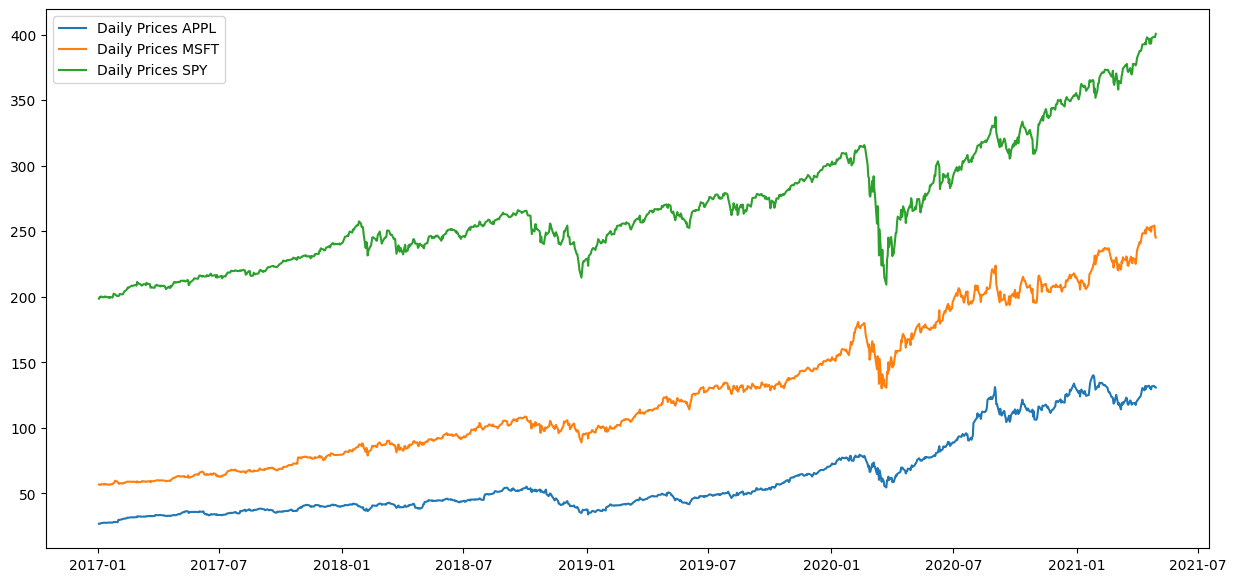

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(data.index, data["Adj Close"]["AAPL"], label="Daily Prices APPL")
plt.plot(data.index, data["Adj Close"]["MSFT"], label="Daily Prices MSFT")
plt.plot(data.index, data["Adj Close"]["SPY"], label="Daily Prices SPY")
plt.legend()
plt.show()

In [14]:
data = yf.download(
    "SPY AAPL MSFT", start="2017-01-01", end="2021-04-30", group_by="ticker"
)
data

[*********************100%%**********************]  3 of 3 completed


Ticker            MSFT                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2017-01-03   62.790001   62.840000   62.130001   62.580002   56.828140   
2017-01-04   62.480000   62.750000   62.119999   62.299999   56.573872   
2017-01-05   62.189999   62.660000   62.029999   62.299999   56.573872   
2017-01-06   62.299999   63.150002   62.040001   62.840000   57.064240   
2017-01-09   62.759998   63.080002   62.540001   62.639999   56.882629   
...                ...         ...         ...         ...         ...   
2021-04-23  257.880005  261.510010  257.269989  261.149994  253.520172   
2021-04-26  261.660004  262.440002  260.170013  261.549988  253.908432   
2021-04-27  261.579987  263.190002  260.119995  261.970001  254.316177   
2021-04-28  256.079987  256.540009  252.949997  254.559998  247.122696   
2021-04-29  255.460007  256.100006  249.000000  252.509995  245.132584   

Ticker                       SPY                                      \
Price         Volume        Open        High         Low       Close   
Date                                                                   
2017-01-03  20694100  225.039993  225.830002  223.880005  225.240005   
2017-01-04  21340000  225.619995  226.750000  225.610001  226.580002   
2017-01-05  24876000  226.270004  226.580002  225.479996  226.399994   
2017-01-06  19922900  226.529999  227.750000  225.899994  227.210007   
2017-01-09  20382700  226.910004  227.070007  226.419998  226.460007   
...              ...         ...         ...         ...         ...   
2021-04-23  21462600  412.869995  418.250000  412.790009  416.739990   
2021-04-26  19763300  417.440002  418.220001  416.809998  417.609985   
2021-04-27  31014200  417.929993  418.140015  416.299988  417.519989   
2021-04-28  46903100  417.809998  419.010010  416.899994  417.399994   
2021-04-29  40589000  420.320007  420.720001  416.440002  420.059998   

Ticker                                  AAPL                          \
Price        Adj Close    Volume        Open        High         Low   
Date                                                                   
2017-01-03  198.560028  91366500   28.950001   29.082500   28.690001   
2017-01-04  199.741302  78744400   28.962500   29.127501   28.937500   
2017-01-05  199.582596  78379000   28.980000   29.215000   28.952499   
2017-01-06  200.296661  71559900   29.195000   29.540001   29.117500   
2017-01-09  199.635544  46939700   29.487499   29.857500   29.485001   
...                ...       ...         ...         ...         ...   
2021-04-23  397.418518  73209200  132.160004  135.119995  132.160004   
2021-04-26  398.248260  52182400  134.830002  135.059998  133.559998   
2021-04-27  398.162415  51303100  135.009995  135.410004  134.110001   
2021-04-28  398.047913  51238900  134.309998  135.020004  133.080002   
2021-04-29  400.584625  78544300  136.470001  137.070007  132.449997   

Ticker                                         
Price            Close   Adj Close     Volume  
Date                                           
2017-01-03   29.037500   26.921541  115127600  
2017-01-04   29.004999   26.891418   84472400  
2017-01-05   29.152500   27.028166   88774400  
2017-01-06   29.477501   27.329483  127007600  
2017-01-09   29.747499   27.579807  134247600  
...                ...         ...        ...  
2021-04-23  134.320007  131.686493   78657500  
2021-04-26  134.720001  132.078629   66905100  
2021-04-27  134.389999  131.755112   66015800  
2021-04-28  133.580002  130.960983  107760100  
2021-04-29  133.479996  130.862946  151101000  

[1088 rows x 18 columns]

In [15]:
spy_price = data["SPY"]["Adj Close"]
spy_price

,Adj Close
Date,
2017-01-03,198.560028
2017-01-04,199.741302
2017-01-05,199.582596
2017-01-06,200.296661
2017-01-09,199.635544
...,...
2021-04-23,397.418518
2021-04-26,398.248260
2021-04-27,398.162415


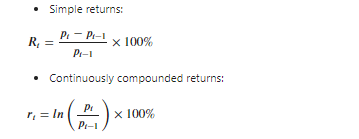

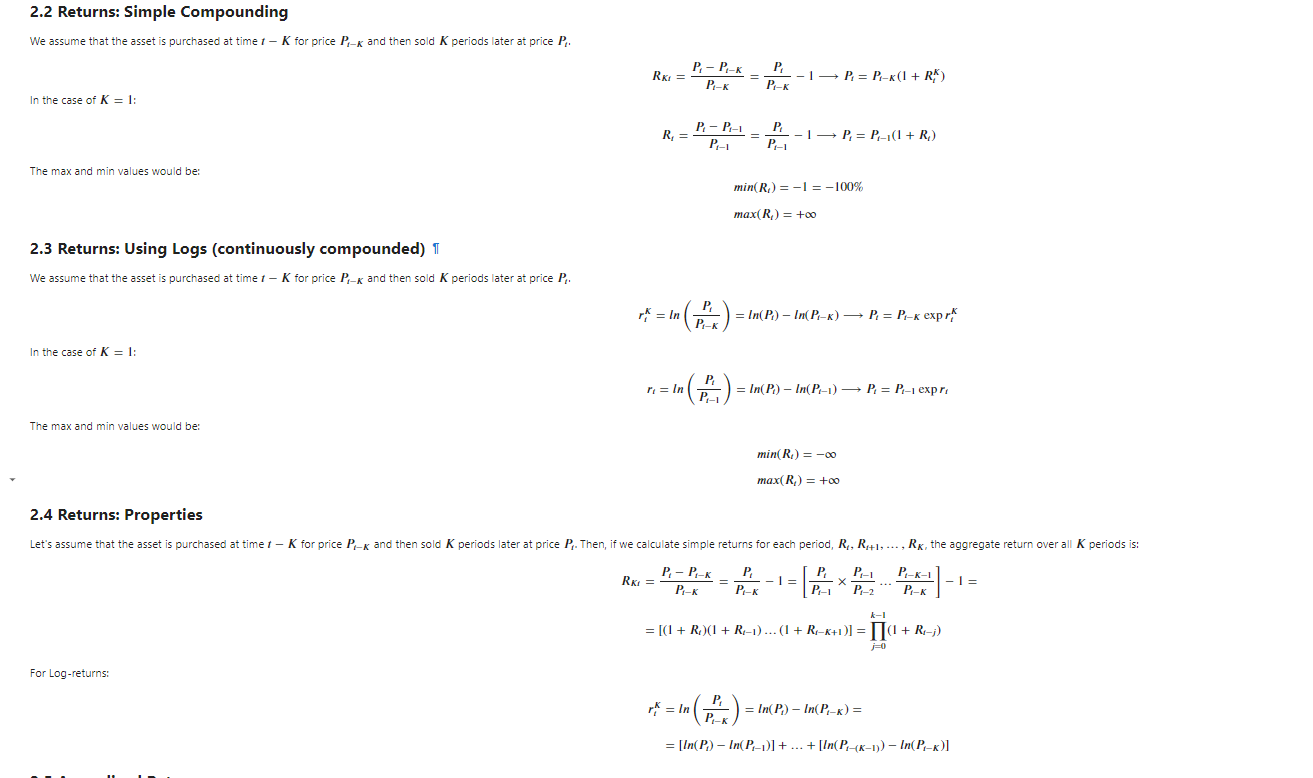

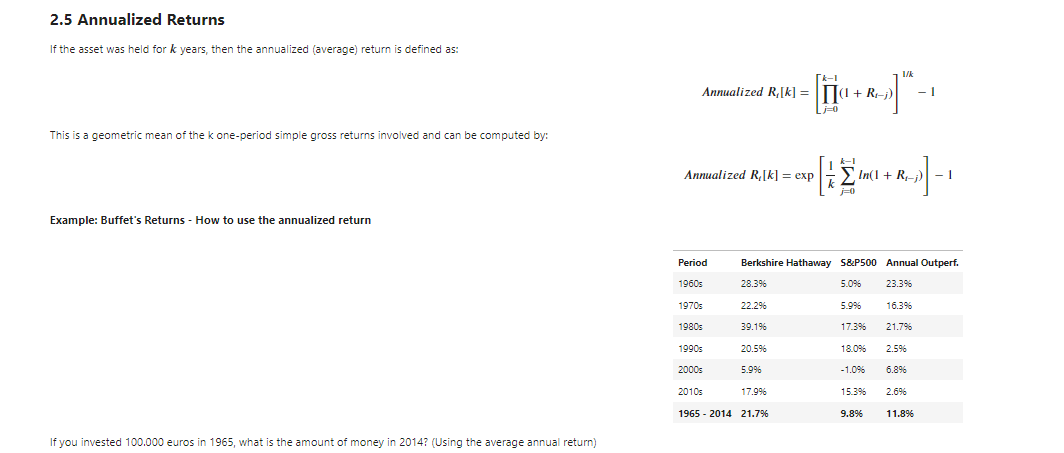

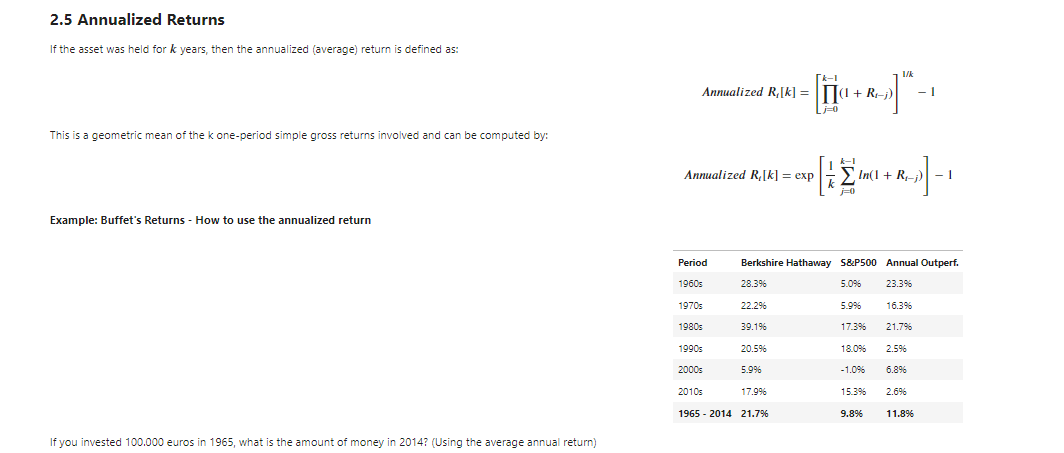

In [16]:
A_ret = 0.217
n_year = 2014 - 1965
Initial_invest = 100000

Total_ret = (1 + A_ret) ** n_year
Final_invest = Initial_invest * Total_ret
print("Your investment will be worth " + str(Final_invest / 10**6) + " millions!")

Your investment will be worth 1510.90908737206 millions!


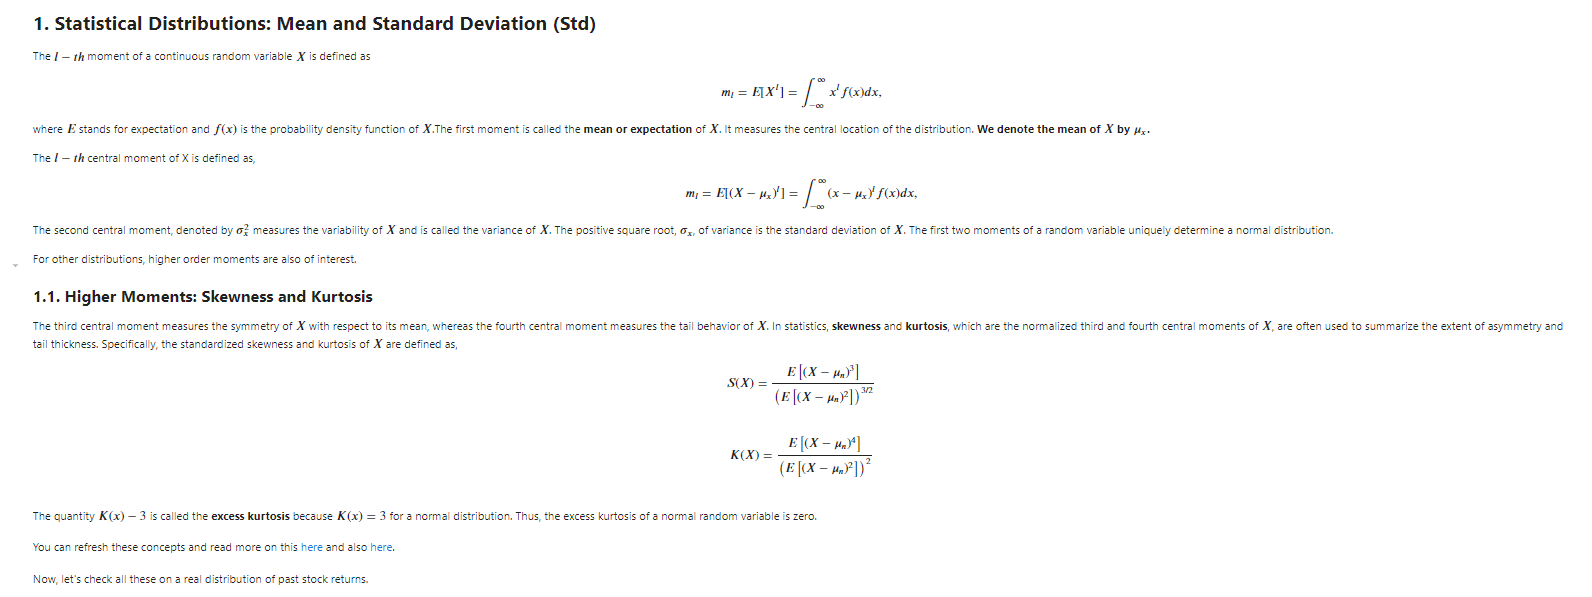

[*********************100%%**********************]  1 of 1 completed


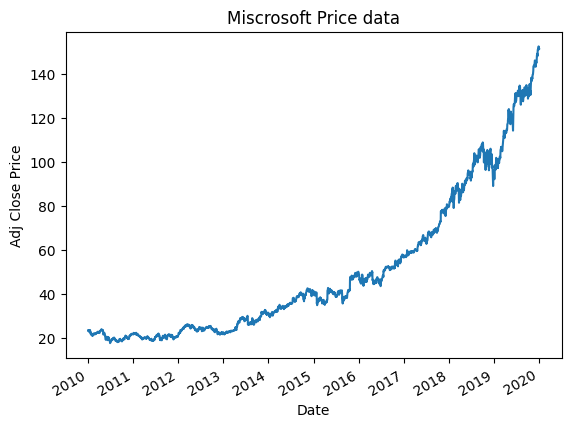

In [17]:
import yfinance as yf

# Get historical market data
hist = yf.download("MSFT", start="2010-01-01", end="2020-01-01")


import matplotlib.pyplot as plt

hist["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Miscrosoft Price data")
plt.show()

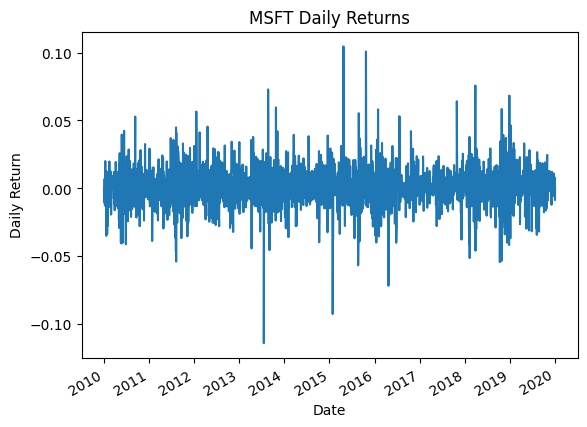

In [18]:
msft_daily_returns = (hist["Adj Close"] / hist["Adj Close"].shift(1)) - 1

msft_daily_returns_frame = msft_daily_returns.to_frame()
msft_daily_returns_frame.columns = ["Simple Daily Returns"]

msft_daily_returns_frame["Simple Daily Returns"].plot()
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("MSFT Daily Returns")
plt.show()

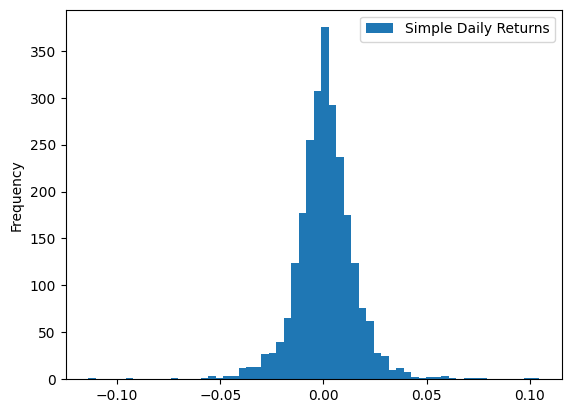

In [19]:
msft_daily_returns_frame.plot.hist(bins=60)
plt.show()

In [20]:
avg_returns_daily = msft_daily_returns.mean()
std_returns_daily = msft_daily_returns.std()
print("The mean of the distribution is = " + str(avg_returns_daily))
print("The std. deviation (volatility) is = " + str(std_returns_daily))

The mean of the distribution is = 0.0008452286019603973
The std. deviation (volatility) is = 0.014312482139649578


In [21]:
from scipy.stats import kurtosis, skew

array_msft = msft_daily_returns.to_numpy()
kurt = kurtosis(array_msft[1:])
sk = skew(array_msft[1:])
print("Kurtosis = " + str(kurt))
print("Skew = " + str(sk))

Kurtosis = 6.280225643999845
Skew = 0.07075725039225723


Jarque Bera Test (Normality Test)

The Jarque-Bera test checks whether the sample data has the skewness and kurtosis that match a normal distribution.

The null hypothesis in the Jarque-Bera test is that the data follows a normal distribution. We are going to use the scipy library to simplify the tasks of performing this test.

In [22]:
import numpy as np
from scipy import stats

# Let's generate 10,000 random numbers following a Normal distribution
x = np.random.randn(10000)

# And check whether the Jarque-Bera test:
jb = stats.jarque_bera(x)
jb

SignificanceResult(statistic=8.875080979657538, pvalue=0.011824986457726519)

In [23]:
# We first need to get rid of the NaN values
msft_ret = msft_daily_returns_frame.dropna()

# Then, we perform the test
jb_msft = stats.jarque_bera(msft_ret)
jb_msft

SignificanceResult(statistic=4135.211255879842, pvalue=0.0)

 T-distribution and T-test

One-Sample T-Test

Null Hypothesis: Sample mean is equal to some value  𝜇0



 .
Alternative Hypothesis: Sample mean is different from  𝜇0
 .

In [24]:
from scipy import stats

stats.ttest_1samp(msft_ret, popmean=0)

TtestResult(statistic=array([2.96161241]), pvalue=array([0.003089]), df=array([2514]))

Two-Sample T-Tes

In [25]:
# We download some data from AAPL (Apple Inc.) to compare mean returns to MSFT:
hist_AAPL = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
aapl_ret = aapl_daily_returns.dropna()

[*********************100%%**********************]  1 of 1 completed


In [26]:
from scipy import stats

stats.ttest_ind(msft_ret, aapl_ret)

TtestResult(statistic=array([-0.06174181,  1.17020088,  0.18817089, ...,  0.08555374,
       -0.35555524, -0.45135332]), pvalue=array([0.95077335, 0.24203106, 0.85075788, ..., 0.93182798, 0.72220349,
       0.65177385]), df=array([2514., 2514., 2514., ..., 2514., 2514., 2514.]))

Volatility of Stock Returns

In [27]:
# AAPL volatility in the 2010-2015 period:
hist_AAPL = yf.download("AAPL", start="2010-01-01", end="2015-12-31")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
aapl_vol = aapl_daily_returns.std() * np.sqrt(252) * 100

print(
    "Apple Annualized Volatility for 2010-2015 is: ",
    "{:.2f}".format(round(aapl_vol, 2)),
    "%",
)

[*********************100%%**********************]  1 of 1 completed

Apple Annualized Volatility for 2010-2015 is:  26.65 %


In [28]:
# AAPL volatility in the 2016-2020 period:
hist_AAPL = yf.download("AAPL", start="2016-01-01", end="2020-12-31")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
aapl_vol = aapl_daily_returns.std() * np.sqrt(252) * 100

print(
    "Apple Annualized Volatility for 2016-2020 is: ",
    "{:.2f}".format(round(aapl_vol, 2)),
    "%",
)

[*********************100%%**********************]  1 of 1 completed

Apple Annualized Volatility for 2016-2020 is:  30.19 %


Correlation between Stock Returns

In [29]:
# Covariance between AAPL and MSFT in the 2010-2015 period:
hist_AAPL = yf.download("AAPL", start="2010-01-01", end="2015-12-31")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
hist_MSFT = yf.download("MSFT", start="2010-01-01", end="2015-12-31")
msft_daily_returns = (hist_MSFT["Adj Close"] / hist_MSFT["Adj Close"].shift(1)) - 1
X = np.stack((msft_daily_returns.dropna(), aapl_daily_returns.dropna()), axis=0)
Cov_1 = np.cov(X)
print("Covariance for AAPL-MSFT for 2010-2015 is: ", Cov_1[0, 1])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Covariance for AAPL-MSFT for 2010-2015 is:  9.311905269813046e-05


In [30]:
# Covariance between AAPL and MSFT in the 2016-2020 period:
hist_AAPL = yf.download("AAPL", start="2016-01-01", end="2020-12-31")
aapl_daily_returns = (hist_AAPL["Adj Close"] / hist_AAPL["Adj Close"].shift(1)) - 1
hist_MSFT = yf.download("MSFT", start="2016-01-01", end="2020-12-31")
msft_daily_returns = (hist_MSFT["Adj Close"] / hist_MSFT["Adj Close"].shift(1)) - 1
X = np.stack((msft_daily_returns.dropna(), aapl_daily_returns.dropna()), axis=0)
Cov_1 = np.cov(X)
print("Covariance for AAPL-MSFT for 2016-2020 is: ", Cov_1[0, 1])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Covariance for AAPL-MSFT for 2016-2020 is:  0.00023742464788573974


## AN EXAMPLE OF CORRELATED STOCK RETURNS

In [31]:
# Import libraries
%matplotlib inline
from math import exp, sqrt

import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [32]:
tickers = ["AAPL", "AMZN", "FB", "GOOG", "MSFT"]
df_tickers = yf.download(tickers, period="10y")["Adj Close"]
df_tickers.head()


[*********************100%%**********************]  5 of 5 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFChartError('%ticker%: No data found, symbol may be delisted')


Ticker,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-08-25,22.539526,16.701000,NaN,28.897686,38.621204
2014-08-26,22.395237,17.091499,NaN,28.781139,38.484413
2014-08-27,22.670498,17.159000,NaN,28.439468,38.364700
2014-08-28,22.697126,17.000999,NaN,28.349815,38.373253
2014-08-29,22.752617,16.952000,NaN,28.469351,38.843525


In [33]:
df_tickers_ret = df_tickers / df_tickers.shift(1) - 1
volatility = (
    df_tickers_ret.std()
)  # This is daily volatility, we will later on annualize it!
df_tickers_corr = df_tickers_ret.corr()
print(df_tickers_corr)

Ticker      AAPL      AMZN  FB      GOOG      MSFT
Ticker                                            
AAPL    1.000000  0.553576 NaN  0.604646  0.680024
AMZN    0.553576  1.000000 NaN  0.647935  0.647756
FB           NaN       NaN NaN       NaN       NaN
GOOG    0.604646  0.647935 NaN  1.000000  0.716393
MSFT    0.680024  0.647756 NaN  0.716393  1.000000


In [34]:
# Perform Cholesky decomposition on coefficient matrix
R = np.linalg.cholesky(df_tickers_corr)

# Compute transpose conjugate (only for validation)
RT = R.T.conj()

# Compare the R matrix and check the reconstruction of the original correlation matrix:
# 1. R  matrix from Cholesky decomposition
print("This is the R matrix: ")
print(R)
# 2. Reconstruct coefficient matrix from factorization (only for validation)
print("This is the reconstructed original correlation matrix ")
print(np.dot(R, RT))

This is the R matrix: 
[[1.         0.         0.         0.         0.        ]
 [0.55357589 0.83279874 0.         0.         0.        ]
 [       nan        nan        nan 0.         0.        ]
 [0.60464622 0.37610167        nan        nan 0.        ]
 [0.68002364 0.32578309        nan        nan        nan]]
This is the reconstructed original correlation matrix 
[[1.         0.55357589        nan        nan        nan]
 [0.55357589 1.                nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]]


In [35]:
T = 252
Num = len(volatility)  # Number of simulated days
stock_price_array = np.full(
    (Num, T), 100.0
)  # Stock price, first value is simulation input
volatility_array = volatility * sqrt(252)  # Volatility (annual, 0.01=1%)
r = 0.001  # Risk-free rate (annual, 0.01=1%)
dt = 1.0 / T  # Time increment (annualized)

In [36]:
stock_price_array

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [37]:
for t in range(1, T):
    # Generate array of random standard normal draws
    random_array = np.random.standard_normal(Num)

    # Multiply R (from factorization) with random_array to obtain correlated epsilons
    epsilon_array = np.inner(random_array, R)

    # Sample price path per stock
    for n in range(Num):
        dt = 1 / T
        S = stock_price_array[n, t - 1]
        v = volatility_array[n]
        epsilon = epsilon_array[n]

        # Generate new stock price
        stock_price_array[n, t] = S * exp(
            (r - 0.5 * v**2) * dt + v * sqrt(dt) * epsilon
        )

<ipython-input-37-aa8b71ca04c5>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = volatility_array[n]


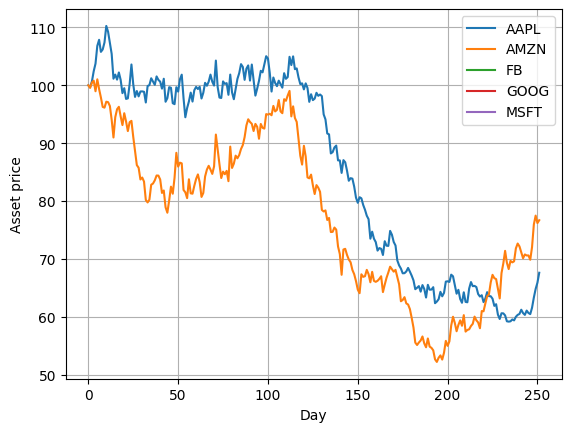

In [38]:
# Plot simulated price paths
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
array_day_plot = [t for t in range(T)]

for n in range(Num):
    ax.plot(array_day_plot, stock_price_array[n], label="{}".format(tickers[n]))

plt.grid()
plt.xlabel("Day")
plt.ylabel("Asset price")
plt.legend(loc="best")

plt.show()

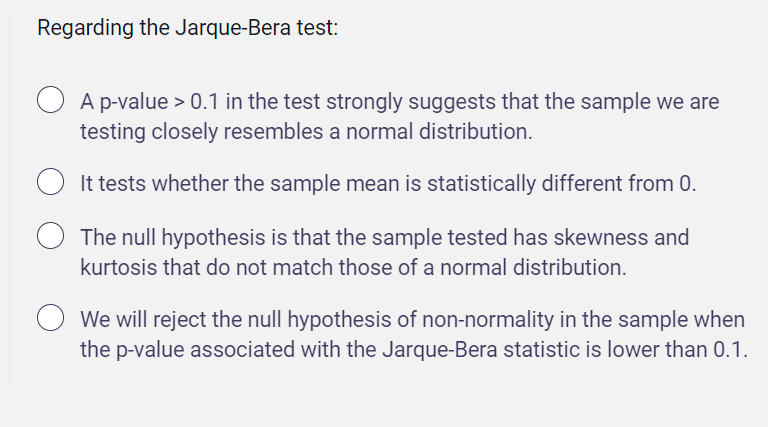

A p-value > 0.1 in the test strongly suggests that the sample we are testing closely resembles a normal distribution.

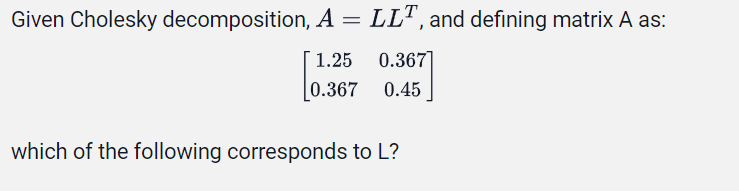

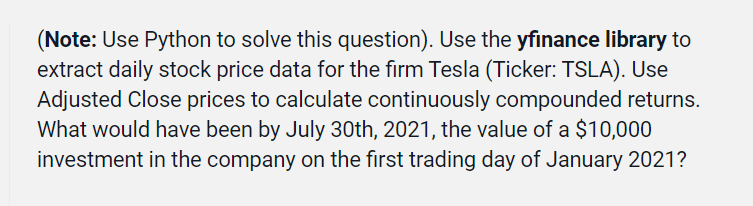

In [39]:
import yfinance as yf
import numpy as np

# Download Tesla stock data from January 1, 2021 to July 30, 2021
tesla_data = yf.download("TSLA", start="2021-01-01", end="2021-07-30")

# Calculate continuously compounded daily returns
tesla_returns = np.log(tesla_data['Adj Close'].pct_change().dropna() + 1)

# Calculate cumulative returns
cumulative_returns = np.cumsum(tesla_returns)

# Calculate investment value on July 30, 2021
investment_value = 10000 * np.exp(cumulative_returns[-1])

print("The investment value on July 30, 2021 would have been:", investment_value)

[*********************100%%**********************]  1 of 1 completed

The investment value on July 30, 2021 would have been: 9281.691730226477



<ipython-input-39-b5678767f1e1>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  investment_value = 10000 * np.exp(cumulative_returns[-1])


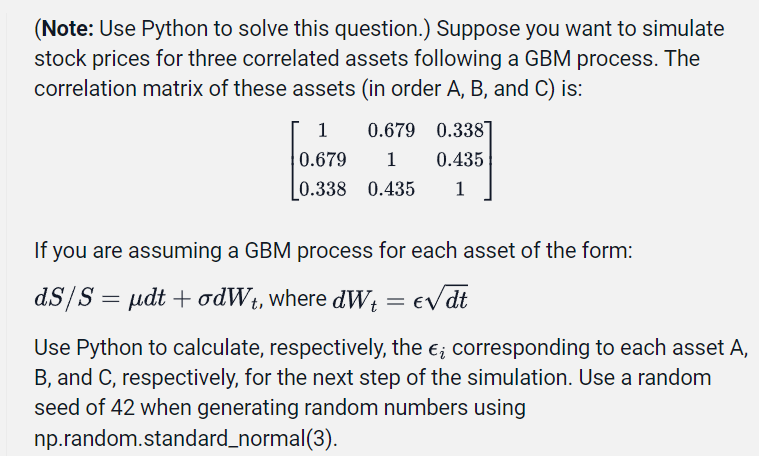

In [40]:
import numpy as np

# Set random seed
np.random.seed(42)

# Correlation matrix
corr_matrix = np.array([[1, 0.679, 0.338],
                       [0.679, 1, 0.435],
                       [0.338, 0.435, 1]])

# Cholesky decomposition to get the lower triangular matrix L
L = np.linalg.cholesky(corr_matrix)

# Generate standard normal random numbers
epsilon = np.random.standard_normal(3)

# Calculate correlated random numbers using L
correlated_epsilon = L @ epsilon

# Print the correlated epsilon values for assets A, B, and C
print("Epsilon for Asset A:", correlated_epsilon[0])
print("Epsilon for Asset B:", correlated_epsilon[1])
print("Epsilon for Asset C:", correlated_epsilon[2])

Epsilon for Asset A: 0.4967141530112327
Epsilon for Asset B: 0.2357637949809548
Epsilon for Asset C: 0.7111710280044938


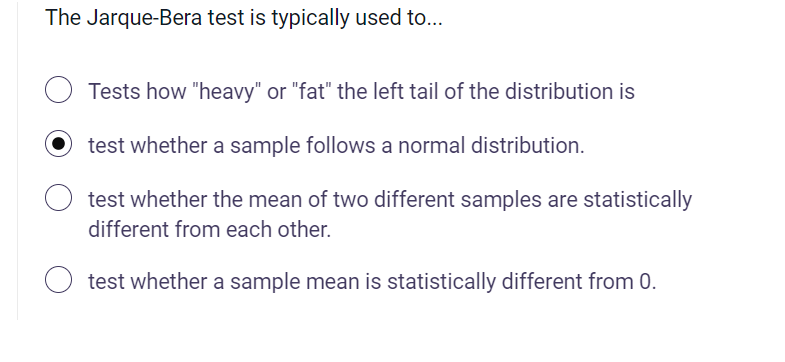

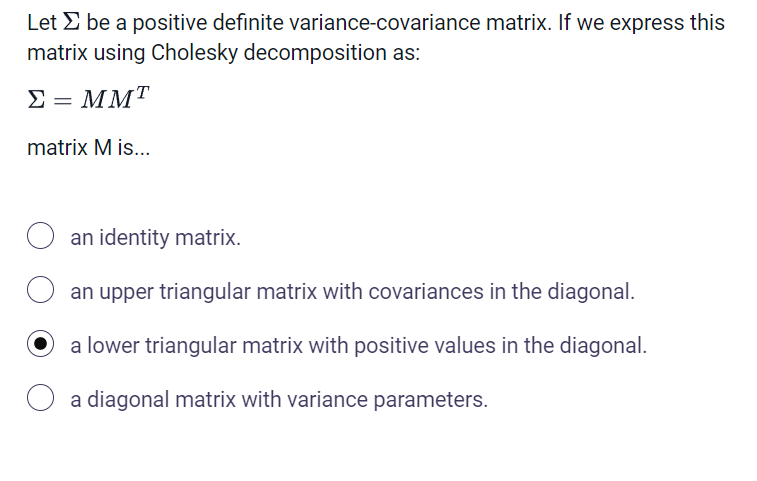

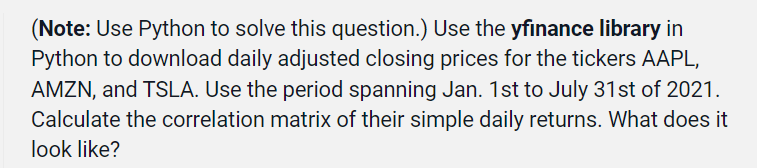

In [42]:
import pandas as pd

In [43]:
import yfinance as yf
import numpy as np

# Download stock data for AAPL, AMZN, and TSLA
aapl_data = yf.download("AAPL", start="2021-01-01", end="2021-07-31")
amzn_data = yf.download("AMZN", start="2021-01-01", end="2021-07-31")
tsla_data = yf.download("TSLA", start="2021-01-01", end="2021-07-31")

# Calculate simple daily returns
aapl_returns = aapl_data['Adj Close'].pct_change().dropna()
amzn_returns = amzn_data['Adj Close'].pct_change().dropna()
tsla_returns = tsla_data['Adj Close'].pct_change().dropna()

# Combine returns into a DataFrame
returns_df = pd.DataFrame({'AAPL': aapl_returns, 'AMZN': amzn_returns, 'TSLA': tsla_returns})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

print(correlation_matrix)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

          AAPL      AMZN      TSLA
AAPL  1.000000  0.591436  0.531812
AMZN  0.591436  1.000000  0.418275
TSLA  0.531812  0.418275  1.000000


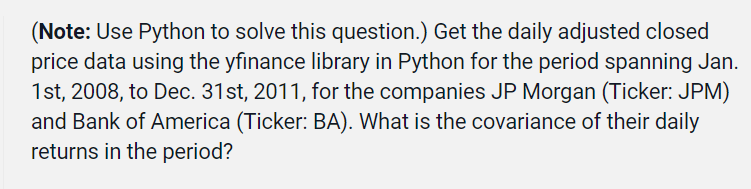

In [44]:
import yfinance as yf
import numpy as np

# Download stock data for JPM and BA
jpm_data = yf.download("JPM", start="2008-01-01", end="2011-12-31")
ba_data = yf.download("BA", start="2008-01-01", end="2011-12-31")

# Calculate simple daily returns
jpm_returns = jpm_data['Adj Close'].pct_change().dropna()
ba_returns = ba_data['Adj Close'].pct_change().dropna()

# Combine returns into a DataFrame
returns_df = pd.DataFrame({'JPM': jpm_returns, 'BA': ba_returns})

# Calculate the covariance matrix
covariance_matrix = returns_df.cov()

# Extract the covariance between JPM and BA
covariance_jpm_ba = covariance_matrix.iloc[0, 1]

print("Covariance between JPM and BA:", covariance_jpm_ba)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Covariance between JPM and BA: 0.0004906917625008966


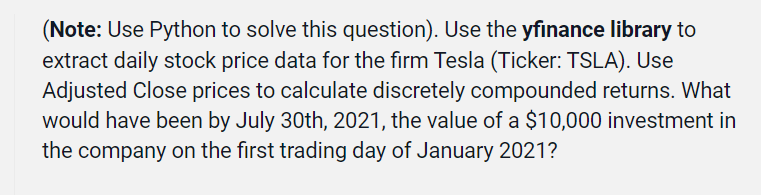

In [45]:
import yfinance as yf
import numpy as np

# Download Tesla stock data from January 1, 2021 to July 30, 2021
tesla_data = yf.download("TSLA", start="2021-01-01", end="2021-07-30")

# Calculate discretely compounded daily returns
tesla_returns = (tesla_data['Adj Close'].pct_change() + 1).cumprod() - 1

# Calculate investment value on July 30, 2021
investment_value = 10000 * (1 + tesla_returns.iloc[-1])

print("The investment value on July 30, 2021 would have been:", investment_value)

[*********************100%%**********************]  1 of 1 completed

The investment value on July 30, 2021 would have been: 9281.691730226483


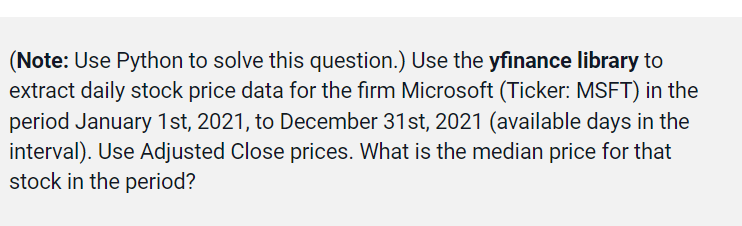

In [2]:
import yfinance as yf

# Define the ticker symbol and the date range
ticker_symbol = "MSFT"
start_date = "2021-01-01"
end_date = "2021-12-31"

# Fetch the data
msft_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate the median of the Adjusted Close prices
median_price = msft_data['Adj Close'].median()
print(median_price)


[*********************100%%**********************]  1 of 1 completed

269.5377197265625


In [17]:
import yfinance as yf

# Download Microsoft stock data
msft_data = yf.download("MSFT", start="2020-12-31", end="2021-12-30")

# Calculate the median adjusted closing price
median_price = msft_data['Adj Close'].median()

print("The median price for Microsoft stock in 2021 is:", median_price)

[*********************100%%**********************]  1 of 1 completed

The median price for Microsoft stock in 2021 is: 264.273681640625


In [18]:
msft_data = yf.download("MSFT", start="2021-01-01", end="2022-01-01")

[*********************100%%**********************]  1 of 1 completed


In [19]:
msft_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,210.844299,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,211.047653,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,205.575348,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,211.425430,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,212.713593,22956200
...,...,...,...,...,...,...
2021-12-27,335.459991,342.480011,335.429993,342.450012,334.461243,19947000
2021-12-28,343.149994,343.809998,340.320007,341.250000,333.289154,15661500
2021-12-29,341.299988,344.299988,339.679993,341.950012,333.972931,15042000


In [20]:
median_price = msft_data['Adj Close'].median()

In [21]:
median_price

269.6885681152344

In [22]:
median_price = msft_data['Adj Close'].mean()

In [23]:
median_price

268.53138908507333

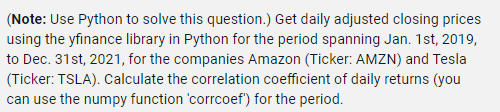

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the ticker symbols and the date range
tickers = ["AMZN", "TSLA"]
start_date = "2019-01-01"
end_date = "2021-12-31"

# Fetch the adjusted closing price data for Amazon and Tesla
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the correlation coefficient between Amazon and Tesla returns
correlation_matrix = np.corrcoef(returns['AMZN'], returns['TSLA'])

# Extract the correlation coefficient
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient of daily returns between Amazon and Tesla:", correlation_coefficient)


[*********************100%%**********************]  2 of 2 completed

Correlation coefficient of daily returns between Amazon and Tesla: 0.40025193389048697


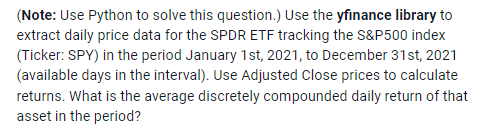

In [25]:
import yfinance as yf
import numpy as np

# Define the ticker symbol and the date range
ticker_symbol = "SPY"
start_date = "2021-01-01"
end_date = "2021-12-31"

# Fetch the adjusted closing price data for SPY
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns (discretely compounded)
daily_returns = np.log(spy_data['Adj Close'] / spy_data['Adj Close'].shift(1))

# Calculate the average daily return
average_daily_return = daily_returns.mean()

print("Average discretely compounded daily return:", average_daily_return)


[*********************100%%**********************]  1 of 1 completed

Average discretely compounded daily return: 0.001075072763173694


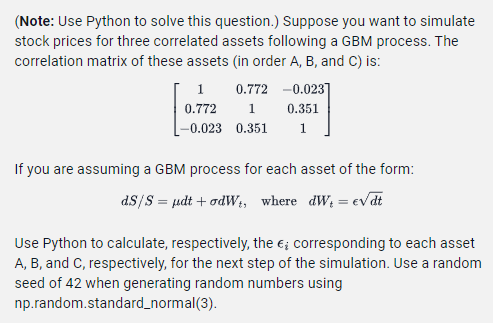

In [26]:
import numpy as np

# Set random seed
np.random.seed(42)

# Correlation matrix
corr_matrix = np.array([[1, 0.772, -0.0237],
                       [0.772, 1, 0.351],
                       [-0.0237, 0.351, 1]])

# Cholesky decomposition to get the lower triangular matrix L
L = np.linalg.cholesky(corr_matrix)

# Generate standard normal random numbers
epsilon = np.random.standard_normal(3)

# Calculate correlated random numbers using L
correlated_epsilon = L @ epsilon

# Print the correlated epsilon values for assets A, B, and C
print("Epsilon for Asset A:", correlated_epsilon[0])
print("Epsilon for Asset B:", correlated_epsilon[1])
print("Epsilon for Asset C:", correlated_epsilon[2])

Epsilon for Asset A: 0.4967141530112327
Epsilon for Asset B: 0.2955794212755612
Epsilon for Asset C: 0.4348290559593588


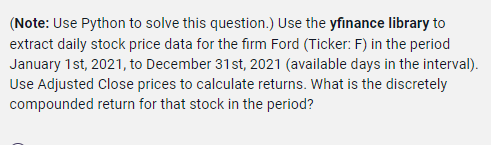

In [27]:
import yfinance as yf

# Download Ford stock data
ford_data = yf.download("F", start="2021-01-01", end="2021-12-31")

# Calculate discretely compounded return
discrete_return = (ford_data['Adj Close'].iloc[-1] / ford_data['Adj Close'].iloc[0]) - 1

print("The discretely compounded return for Ford stock in 2021 is:", discrete_return)

[*********************100%%**********************]  1 of 1 completed

The discretely compounded return for Ford stock in 2021 is: 1.4146798777038203


In [28]:
import yfinance as yf

# Download Ford stock data
ford_data = yf.download("F", start="2021-01-01", end="2021-12-31")

# Calculate discretely compounded return as a percentage
discrete_return_percentage = ((ford_data['Adj Close'].iloc[-1] / ford_data['Adj Close'].iloc[0]) - 1) * 100

print("The discretely compounded return for Ford stock in 2021 is:", discrete_return_percentage, "%")

[*********************100%%**********************]  1 of 1 completed

The discretely compounded return for Ford stock in 2021 is: 141.46798777038202 %


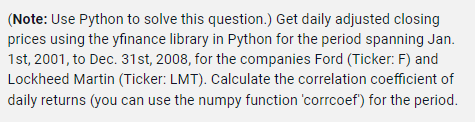

In [29]:
import yfinance as yf
import numpy as np

# Download stock data for Ford and Lockheed Martin
ford_data = yf.download("F", start="2001-01-01", end="2008-12-31")
lmt_data = yf.download("LMT", start="2001-01-01", end="2008-12-31")

# Calculate daily returns
ford_returns = ford_data['Adj Close'].pct_change().dropna()
lmt_returns = lmt_data['Adj Close'].pct_change().dropna()

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(ford_returns, lmt_returns)[0, 1]

print("The correlation coefficient between Ford and Lockheed Martin daily returns is:", correlation_coefficient)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The correlation coefficient between Ford and Lockheed Martin daily returns is: 0.22835303834900567


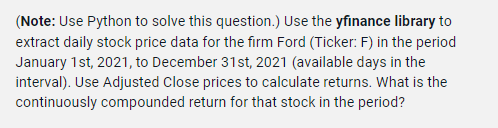

In [30]:
import yfinance as yf
import numpy as np

# Download Ford stock data
ford_data = yf.download("F", start="2021-01-01", end="2021-12-31")

# Calculate continuously compounded return
continuous_return = np.log(ford_data['Adj Close'].iloc[-1] / ford_data['Adj Close'].iloc[0])

print("The continuously compounded return for Ford stock in 2021 is:", continuous_return)

[*********************100%%**********************]  1 of 1 completed

The continuously compounded return for Ford stock in 2021 is: 0.8815667225020138


In [31]:
import yfinance as yf
import numpy as np

# Download Ford stock data
ford_data = yf.download("F", start="2021-01-01", end="2021-12-31")

# Calculate continuously compounded return as a percentage
continuous_return_percentage = (np.exp(np.log(ford_data['Adj Close'].iloc[-1] / ford_data['Adj Close'].iloc[0])) - 1) * 100

print("The continuously compounded return for Ford stock in 2021 is:", continuous_return_percentage, "%")

[*********************100%%**********************]  1 of 1 completed

The continuously compounded return for Ford stock in 2021 is: 141.46798777038202 %


In [32]:
import yfinance as yf
import numpy as np

# Define the ticker symbol and the date range
ticker_symbol = "F"
start_date = "2021-01-01"
end_date = "2021-12-31"

# Fetch the adjusted closing price data for Ford
ford_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns (continuously compounded)
daily_log_returns = np.log(ford_data['Adj Close'] / ford_data['Adj Close'].shift(1))

# Calculate the total continuously compounded return over the period
total_continuously_compounded_return = daily_log_returns.sum()

print("Continuously compounded return for Ford in 2021:", total_continuously_compounded_return)


[*********************100%%**********************]  1 of 1 completed

Continuously compounded return for Ford in 2021: 0.8815667225020135


In [33]:
import yfinance as yf
import numpy as np

# Define the ticker symbol and the date range
ticker_symbol = "F"
start_date = "2021-01-01"
end_date = "2021-12-31"

# Fetch the adjusted closing price data for Ford
ford_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns (continuously compounded)
daily_log_returns = np.log(ford_data['Adj Close'] / ford_data['Adj Close'].shift(1))

# Calculate the total continuously compounded return over the period
total_continuously_compounded_return = daily_log_returns.sum()

# Convert to percentage
total_return_percentage = total_continuously_compounded_return * 100

print("Continuously compounded return for Ford in 2021 (%):", total_return_percentage)


[*********************100%%**********************]  1 of 1 completed

Continuously compounded return for Ford in 2021 (%): 88.15667225020135


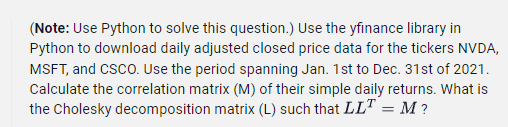

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the tickers and the date range
tickers = ['NVDA', 'MSFT', 'CSCO']
start_date = '2021-01-01'
end_date = '2021-12-31'

# Download daily adjusted close price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the correlation matrix of the daily returns
correlation_matrix = daily_returns.corr()

# Perform Cholesky decomposition
cholesky_matrix = np.linalg.cholesky(correlation_matrix)

correlation_matrix, cholesky_matrix


[*********************100%%**********************]  3 of 3 completed


(Ticker      CSCO      MSFT      NVDA
 Ticker                              
 CSCO    1.000000  0.432329  0.163176
 MSFT    0.432329  1.000000  0.588334
 NVDA    0.163176  0.588334  1.000000,
 array([[1.        , 0.        , 0.        ],
        [0.43232906, 0.90171591, 0.        ],
        [0.16317559, 0.5742259 , 0.80227074]]))

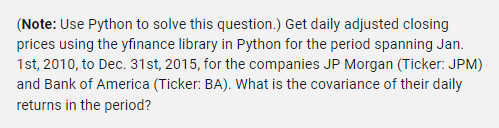

In [35]:
import yfinance as yf
import numpy as np

# Download stock data for JPM and BA
jpm_data = yf.download("JPM", start="2010-01-01", end="2015-12-31")
ba_data = yf.download("BA", start="2010-01-01", end="2015-12-31")

# Calculate daily returns
jpm_returns = jpm_data['Adj Close'].pct_change().dropna()
ba_returns = ba_data['Adj Close'].pct_change().dropna()

# Combine returns into a DataFrame
returns_df = pd.DataFrame({'JPM': jpm_returns, 'BA': ba_returns})

# Calculate the covariance matrix
covariance_matrix = returns_df.cov()

# Extract the covariance between JPM and BA
covariance_jpm_ba = covariance_matrix.iloc[0, 1]

print("Covariance between JPM and BA:", covariance_jpm_ba)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Covariance between JPM and BA: 0.00014573767366254077
